In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def TDT(n):
    b = n[0] + n[2] + 2*n[3]
    c = n[1] + n[2] + 2*n[4]
    
    if b == 0 and c == 0:
        return 0
    elif b == 0:
        return 1000000000
    else:
        return (b-c)**2/(b+c)

def SHD(cc, n):
    T = TDT(n)
    
    d = np.zeros(2)
    N = np.zeros(6)
    
    for k in range(6):
        N[k] = n[k]
    
    if T < cc:
        while T < cc:
            if N[4] > 0:
                N[4] -= 1
            elif N[1] > 0:
                N[1] -= 1
            elif N[2] > 0:
                N[2] -= 1
            elif N[5] > 0:
                N[5] -= 1
            else:
                N[0] -= 1
            N[3] += 1
            
            T = TDT(N)
            d[0] -= 1
        
        T = TDT(n)
        for k in range(6):
            N[k] = n[k]
        
        while T < cc:
            if N[3] > 0:
                N[3] -= 1
            elif N[0] > 0:
                N[0] -= 1
            elif N[2] > 0:
                N[2] -= 1
            elif N[5] > 0:
                N[5] -= 1
            else:
                N[1] -= 1
            N[4] += 1
            
            T = TDT(N)
            d[1] -= 1
        
        if d[0] > d[1]:
            return d[0]
        else:
            return d[1]
    
    else:
        step = 0
        
        if n[0] + 2*n[3] > n[1] + 2*n[4]:
            while T >= cc:
                if n[3] > 0:
                    n[3] -= 1
                elif n[0] > 0:
                    n[0] -= 1
                elif n[5] > 0:
                    n[5] -= 1
                elif n[2] > 0:
                    n[2] -= 1
                else:
                    n[1] -= 1
                n[4] += 1
            
                T = TDT(n)
                step += 1
        else:
            while T >= cc:
                if n[4] > 0:
                    n[4] -= 1
                elif n[1] > 0:
                    n[1] -= 1
                elif n[5] > 0:
                    n[5] -= 1
                elif n[2] > 0:
                    n[2] -= 1
                else:
                    n[0] -= 1
                n[3] += 1
            
                T = TDT(n)
                step += 1
        
        return step-1

In [3]:
def appx_SHD(cc,n):
    b = n[0] + n[2] + 2*n[3]
    c = n[1] + n[2] + 2*n[4]
    
    T = TDT(n)
    
    s = b + c
    d = math.fabs(b-c)
    
    if T >= cc:
        return math.ceil((d-math.sqrt(s*cc)) / 4) - 1
    
    else:
        if b + c < cc:
            return -math.ceil((2*cc - s - d)/4)
        else:
            return -math.ceil((math.sqrt(s*cc)-d)/4)

In [4]:
def random_num(pd):
    dist = np.cumsum(pd).tolist()
    dist[-1] = 1.0
    num = np.random.rand()
    dist.append(num)
    return sorted(dist).index(num)

def exp_mec(shd, m, K, epsilon):
    S = np.zeros(K)
    k = 0
    
    w = np.zeros(m)
    p = np.zeros(m)
    
    while k < K:
        sumw = 0
        for i in range(m):
            w[i] = math.exp(epsilon * shd[i] / (2*K))
            sumw += w[i]
        for i in range(m):
            p[i] = w[i]/sumw
            
        x = random_num(p)
        shd[x] = -1000000.0
        S[k] = x
        k += 1
    
    return S

In [5]:
chi2 = np.zeros(649669)
b = np.zeros(649669)
c = np.zeros(649669)
n = np.zeros((649669, 6))

In [6]:
chi2[0:7] = [29.83, 29.96, 33.76, 31.74, 30.52, 32.67, 29.36]

for i in range(7,17):
    while(1):
        t = np.random.chisquare(1)
        if(t >= 23.93 and t <= 25.26):
            chi2[i] = t
            break
            
for i in range(17,65):
    while(1):
        t = np.random.chisquare(1)
        if(t >= 15.14 and t <= 23.93):
            chi2[i] = t
            break

for i in range(65,649669):
    while(1):
        t = np.random.chisquare(1)
        if(t <= 15.14):
            chi2[i] = t
            break

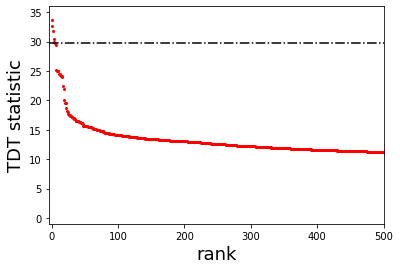

In [7]:
order = np.zeros(649669)
for i in range(649669):
    order[i] = i
    
chi2 = sorted(chi2, reverse=True)


fig = plt.figure()
plt.ylim(-1, 36)
plt.xlim(-4, 500)
plt.plot(order, chi2, marker="o", markersize=2, color = "red", linestyle = "None")
plt.axhline(29.7, color = "black", linestyle = "-.")
plt.xlabel("rank", fontsize = 18)
plt.ylabel("TDT statistic", fontsize = 18)
fig.savefig("stats_real.png")
fig.savefig("fig/stats_real.eps")

In [8]:
#K = 3, epsilon = 7

correct = np.zeros(2)

N = 215
M = 649669

K = 3

appx_shd = np.zeros(M)
shd = np.zeros(M)

for j in range(30):
    for i in range(M):
        while(1):
            c[i] = np.random.randint(0, 216)
            b[i] = int((2*c[i] + chi2[i] + math.sqrt(chi2[i]*(chi2[i] + 8*c[i]))) / 2)+1
            if(b[i] + c[i] < 430):
                break
        while(1):
            n[i][2] = np.random.randint(0, c[i]+1)
            n[i][4] = np.random.randint(0, int((c[i] - n[i][2])/2)+1)
            n[i][1] = c[i] - n[i][2] - 2*n[i][4]
            n[i][3] = np.random.randint(0, int((b[i] - n[i][2])/2)+1)
            n[i][0] = b[i] - n[i][2] - 2*n[i][3]
            n[i][5] = 215 - (n[i][0]+n[i][1]+n[i][2]+n[i][3]+n[i][4])
            if(n[i][0] >= 0 and n[i][1] >= 0 and n[i][2] >= 0 and n[i][3] >= 0 and n[i][4] >= 0 and n[i][5] >= 0):
                break
                
    for i in range(M):
        k = [int(n[i][0]), int(n[i][1]), int(n[i][2]), int(n[i][3]), int(n[i][4]), int(n[i][5])]
        appx_shd[i] = appx_SHD(3.84, k)
        shd[i] = SHD(3.84, k)
    
    #print(appx_shd)
    #print(shd)

    appx_result = exp_mec(appx_shd, M, K, 7)
    exact_result = exp_mec(shd, M, K, 7)
    
    #print(appx_result)
    #print(exact_result)
    
    for k in range(K):
        if appx_result[k] < 6:
            correct[0] += 1
        if exact_result[k] < 6:
            correct[1] += 1
    
    print(correct)

[1. 2.]
[3. 5.]
[3. 6.]
[5. 8.]
[6. 9.]
[ 9. 11.]
[12. 14.]
[15. 17.]
[17. 19.]
[19. 21.]
[21. 23.]
[24. 25.]
[26. 28.]
[28. 31.]
[31. 33.]
[34. 35.]
[37. 37.]
[39. 39.]
[42. 42.]
[45. 45.]
[46. 46.]
[47. 47.]
[49. 50.]
[52. 53.]
[53. 55.]
[56. 58.]
[59. 61.]
[61. 64.]
[63. 66.]
[65. 67.]


In [9]:
#K = 3, epsilon = 5

correct = np.zeros(2)

N = 215
M = 649669

K = 3

appx_shd = np.zeros(M)
shd = np.zeros(M)

for j in range(30):
    for i in range(M):
        while(1):
            c[i] = np.random.randint(0, 216)
            b[i] = int((2*c[i] + chi2[i] + math.sqrt(chi2[i]*(chi2[i] + 8*c[i]))) / 2)+1
            if(b[i] + c[i] < 430):
                break
        while(1):
            n[i][2] = np.random.randint(0, c[i]+1)
            n[i][4] = np.random.randint(0, int((c[i] - n[i][2])/2)+1)
            n[i][1] = c[i] - n[i][2] - 2*n[i][4]
            n[i][3] = np.random.randint(0, int((b[i] - n[i][2])/2)+1)
            n[i][0] = b[i] - n[i][2] - 2*n[i][3]
            n[i][5] = 215 - (n[i][0]+n[i][1]+n[i][2]+n[i][3]+n[i][4])
            if(n[i][0] >= 0 and n[i][1] >= 0 and n[i][2] >= 0 and n[i][3] >= 0 and n[i][4] >= 0 and n[i][5] >= 0):
                break
                
    for i in range(M):
        k = [int(n[i][0]), int(n[i][1]), int(n[i][2]), int(n[i][3]), int(n[i][4]), int(n[i][5])]
        appx_shd[i] = appx_SHD(3.84, k)
        shd[i] = SHD(3.84, k)
    
    #print(appx_shd)
    #print(shd)

    appx_result = exp_mec(appx_shd, M, K, 5)
    exact_result = exp_mec(shd, M, K, 5)
    
    #print(appx_result)
    #print(exact_result)
    
    for k in range(K):
        if appx_result[k] < 6:
            correct[0] += 1
        if exact_result[k] < 6:
            correct[1] += 1
    
    print(correct)

[1. 1.]
[2. 3.]
[4. 6.]
[6. 8.]
[ 9. 10.]
[10. 11.]
[11. 12.]
[13. 13.]
[14. 15.]
[17. 17.]
[18. 17.]
[19. 20.]
[21. 22.]
[22. 24.]
[23. 26.]
[24. 27.]
[26. 29.]
[27. 30.]
[30. 32.]
[32. 35.]
[33. 36.]
[35. 38.]
[36. 40.]
[37. 41.]
[40. 43.]
[42. 45.]
[45. 48.]
[48. 51.]
[50. 53.]
[51. 55.]


In [10]:
#K = 3, epsilon = 3

correct = np.zeros(2)

N = 215
M = 649669

K = 3

appx_shd = np.zeros(M)
shd = np.zeros(M)

for j in range(30):
    for i in range(M):
        while(1):
            c[i] = np.random.randint(0, 216)
            b[i] = int((2*c[i] + chi2[i] + math.sqrt(chi2[i]*(chi2[i] + 8*c[i]))) / 2)+1
            if(b[i] + c[i] < 430):
                break
        while(1):
            n[i][2] = np.random.randint(0, c[i]+1)
            n[i][4] = np.random.randint(0, int((c[i] - n[i][2])/2)+1)
            n[i][1] = c[i] - n[i][2] - 2*n[i][4]
            n[i][3] = np.random.randint(0, int((b[i] - n[i][2])/2)+1)
            n[i][0] = b[i] - n[i][2] - 2*n[i][3]
            n[i][5] = 215 - (n[i][0]+n[i][1]+n[i][2]+n[i][3]+n[i][4])
            if(n[i][0] >= 0 and n[i][1] >= 0 and n[i][2] >= 0 and n[i][3] >= 0 and n[i][4] >= 0 and n[i][5] >= 0):
                break
                
    for i in range(M):
        k = [int(n[i][0]), int(n[i][1]), int(n[i][2]), int(n[i][3]), int(n[i][4]), int(n[i][5])]
        appx_shd[i] = appx_SHD(3.84, k)
        shd[i] = SHD(3.84, k)
    
    #print(appx_shd)
    #print(shd)

    appx_result = exp_mec(appx_shd, M, K, 3)
    exact_result = exp_mec(shd, M, K, 3)
    
    #print(appx_result)
    #print(exact_result)
    
    for k in range(K):
        if appx_result[k] < 6:
            correct[0] += 1
        if exact_result[k] < 6:
            correct[1] += 1
    
    print(correct)

[0. 0.]
[1. 1.]
[2. 2.]
[2. 2.]
[3. 2.]
[3. 2.]
[3. 2.]
[3. 3.]
[3. 4.]
[3. 4.]
[4. 5.]
[4. 5.]
[4. 5.]
[4. 6.]
[5. 6.]
[6. 6.]
[6. 7.]
[6. 7.]
[7. 7.]
[7. 7.]
[7. 7.]
[7. 7.]
[7. 7.]
[7. 7.]
[7. 8.]
[7. 9.]
[7. 9.]
[8. 9.]
[8. 9.]
[8. 9.]


In [11]:
#K = 3, epsilon = 2

correct = np.zeros(2)

N = 215
M = 649669

K = 3

appx_shd = np.zeros(M)
shd = np.zeros(M)

for j in range(30):
    for i in range(M):
        while(1):
            c[i] = np.random.randint(0, 216)
            b[i] = int((2*c[i] + chi2[i] + math.sqrt(chi2[i]*(chi2[i] + 8*c[i]))) / 2)+1
            if(b[i] + c[i] < 430):
                break
        while(1):
            n[i][2] = np.random.randint(0, c[i]+1)
            n[i][4] = np.random.randint(0, int((c[i] - n[i][2])/2)+1)
            n[i][1] = c[i] - n[i][2] - 2*n[i][4]
            n[i][3] = np.random.randint(0, int((b[i] - n[i][2])/2)+1)
            n[i][0] = b[i] - n[i][2] - 2*n[i][3]
            n[i][5] = 215 - (n[i][0]+n[i][1]+n[i][2]+n[i][3]+n[i][4])
            if(n[i][0] >= 0 and n[i][1] >= 0 and n[i][2] >= 0 and n[i][3] >= 0 and n[i][4] >= 0 and n[i][5] >= 0):
                break
                
    for i in range(M):
        k = [int(n[i][0]), int(n[i][1]), int(n[i][2]), int(n[i][3]), int(n[i][4]), int(n[i][5])]
        appx_shd[i] = appx_SHD(3.84, k)
        shd[i] = SHD(3.84, k)
    
    #print(appx_shd)
    #print(shd)

    appx_result = exp_mec(appx_shd, M, K, 2)
    exact_result = exp_mec(shd, M, K, 2)
    
    #print(appx_result)
    #print(exact_result)
    
    for k in range(K):
        if appx_result[k] < 6:
            correct[0] += 1
        if exact_result[k] < 6:
            correct[1] += 1
    
    print(correct)

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 1.]
[0. 1.]
[0. 1.]


In [12]:
#K = 3, epsilon = 1

correct = np.zeros(2)

N = 215
M = 649669

K = 3

appx_shd = np.zeros(M)
shd = np.zeros(M)

for j in range(30):
    for i in range(M):
        while(1):
            c[i] = np.random.randint(0, 216)
            b[i] = int((2*c[i] + chi2[i] + math.sqrt(chi2[i]*(chi2[i] + 8*c[i]))) / 2)+1
            if(b[i] + c[i] < 430):
                break
        while(1):
            n[i][2] = np.random.randint(0, c[i]+1)
            n[i][4] = np.random.randint(0, int((c[i] - n[i][2])/2)+1)
            n[i][1] = c[i] - n[i][2] - 2*n[i][4]
            n[i][3] = np.random.randint(0, int((b[i] - n[i][2])/2)+1)
            n[i][0] = b[i] - n[i][2] - 2*n[i][3]
            n[i][5] = 215 - (n[i][0]+n[i][1]+n[i][2]+n[i][3]+n[i][4])
            if(n[i][0] >= 0 and n[i][1] >= 0 and n[i][2] >= 0 and n[i][3] >= 0 and n[i][4] >= 0 and n[i][5] >= 0):
                break
                
    for i in range(M):
        k = [int(n[i][0]), int(n[i][1]), int(n[i][2]), int(n[i][3]), int(n[i][4]), int(n[i][5])]
        appx_shd[i] = appx_SHD(3.84, k)
        shd[i] = SHD(3.84, k)
    
    #print(appx_shd)
    #print(shd)

    appx_result = exp_mec(appx_shd, M, K, 1)
    exact_result = exp_mec(shd, M, K, 1)
    
    #print(appx_result)
    #print(exact_result)
    
    for k in range(K):
        if appx_result[k] < 6:
            correct[0] += 1
        if exact_result[k] < 6:
            correct[1] += 1
    
    print(correct)

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
